In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)

In [9]:
from google.colab import files
uploaded = files.upload()

Saving superstore_final_dataset.csv to superstore_final_dataset (1).csv


In [6]:
import os

os.listdir()



['.config',
 'superstore_final_dataset.csv',
 'cleaned_superstore.xlsx',
 'sample_data']

In [10]:
df = pd.read_csv(
    'superstore_final_dataset.csv',
    encoding='latin1',
    sep=',',
    engine='python'
)

df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [11]:
df.shape

(9800, 18)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
df.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [14]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [15]:
df.isnull().sum()


,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


In [16]:
df = df.dropna()


In [17]:
df.duplicated().sum()


np.int64(0)

In [18]:
df = df.drop_duplicates()


In [19]:
df.columns = df.columns.str.strip()
df.columns




Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [20]:
'Sales' in df.columns
'Profit' in df.columns
'Order Date' in df.columns
'Region' in df.columns
'Category' in df.columns


True

In [21]:
df['Order_Date']


,Order_Date
0,8/11/2017
1,8/11/2017
2,12/6/2017
3,11/10/2016
4,11/10/2016
...,...
9795,21/05/2017
9796,12/1/2016
9797,12/1/2016
9798,12/1/2016


In [22]:
df.rename(columns={'Order Date ': 'Order_Date'}, inplace=True)



In [23]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))

# Try a few common encodings safely
encodings_to_try = ['cp1252', 'latin1', 'iso-8859-1']

df_raw = None
last_err = None
for enc in encodings_to_try:
    try:
        df_raw = pd.read_csv(io.BytesIO(uploaded[filename]),
                             encoding=enc,
                             engine='python')  # more tolerant of odd separators
        print(f"Loaded with encoding: {enc}")
        break
    except Exception as e:
        last_err = e
        print(f"Failed with {enc}: {e}")

if df_raw is None:
    raise RuntimeError(f"Could not read CSV with fallback encodings. Last error: {last_err}")

# Proceed with your normalization
df = df_raw.copy()
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('-', '_'))
df.head()


Saving superstore_final_dataset.csv to superstore_final_dataset (2).csv
Loaded with encoding: cp1252


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [24]:
import numpy as np

for col in df.select_dtypes(include=['object']).columns:
    df[col] = (df[col]
               .astype(str)
               .str.replace('\u00a0', ' ', regex=False)  # replace NBSP with space
               .str.strip()
               .replace({'nan': np.nan}))  # restore NaNs where "nan" strings appeared


In [25]:
print("Rows:", df.shape[0], "Columns:", df.shape[1])
print(df.dtypes.head())

# Spot-check for weird characters remaining
sample_cols = df.select_dtypes(include=['object']).columns[:5]
df[sample_cols].head(10)


Rows: 9800 Columns: 18
row_id         int64
order_id      object
order_date    object
ship_date     object
ship_mode     object
dtype: object


,order_id,order_date,ship_date,ship_mode,customer_id
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520
1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335
5,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710
6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710
7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710
8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710
9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710


In [26]:
# Shape and column names
print("Rows:", df.shape[0], "Columns:", df.shape[1])
print("Column names:", df.columns.tolist())

# Data types
print("\nData types:\n", df.dtypes)

# First few rows
df.head()


Rows: 9800 Columns: 18
Column names: ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales']

Data types:
 row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code      float64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
dtype: object


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [27]:
# Summary statistics
df.describe(include='all').T

# Median for numeric columns
df.select_dtypes(include='number').median()

# Mode (first mode for each column)
df.mode().iloc[0]

# Missing values
df.isna().sum()


,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [34]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')


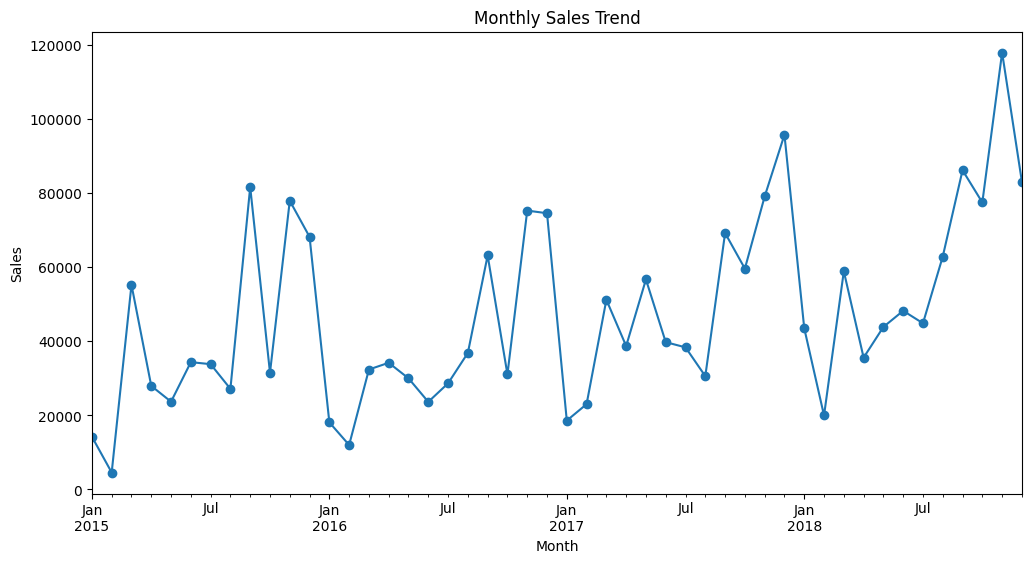

In [35]:
# Convert order_date correctly
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

# Group by month
monthly_sales = df.groupby(df['order_date'].dt.to_period("M"))['sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()


In [36]:
['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales']


['row_id',
 'order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'postal_code',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'sales']

Total Revenue: 2261536.78
Average Order Value: 230.77
Total Orders: 4922

Sales by Region:
 region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: sales, dtype: float64

Sales by Category:
 category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: sales, dtype: float64


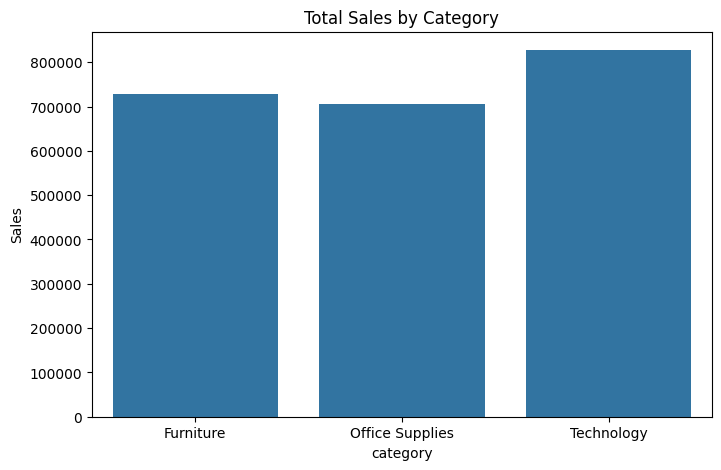

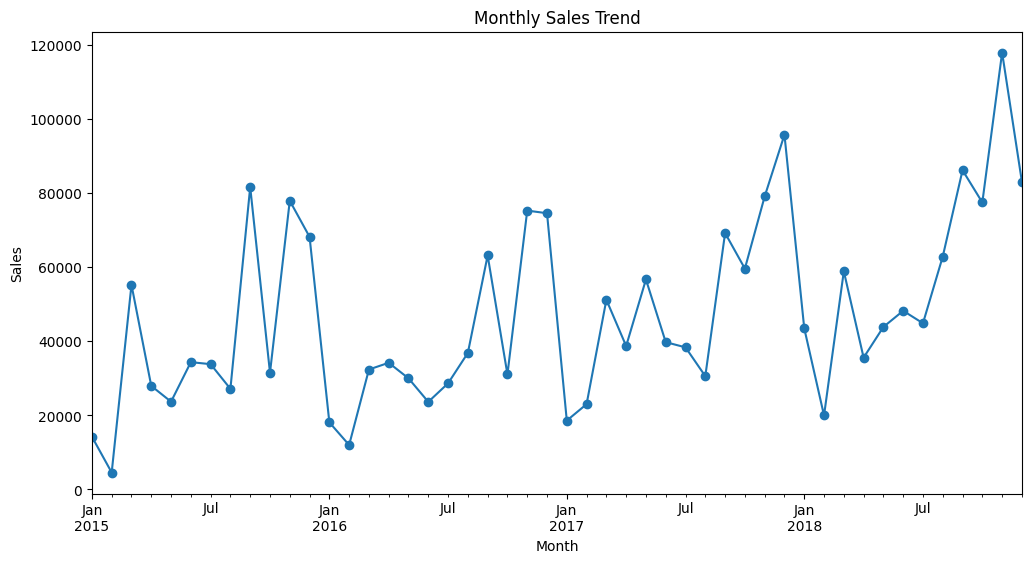

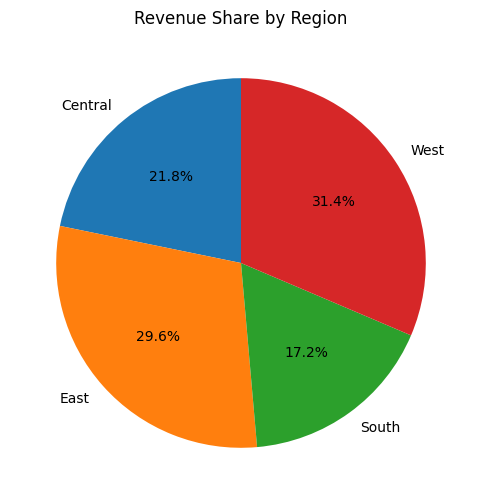


Top 10 Products by Sales:
 sub_category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: sales, dtype: float64


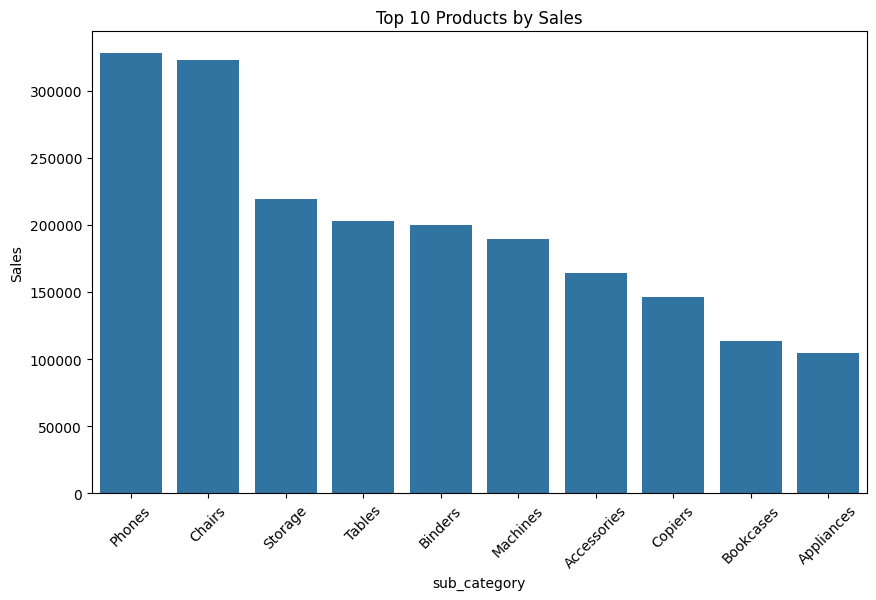

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with encoding fix
df = pd.read_csv("superstore_final_dataset.csv", encoding="ISO-8859-1")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# -----------------------------
# 1. KPIs
# -----------------------------
total_revenue = df['sales'].sum()
average_order_value = df['sales'].mean()
total_orders = df['order_id'].nunique()

print("Total Revenue:", round(total_revenue, 2))
print("Average Order Value:", round(average_order_value, 2))
print("Total Orders:", total_orders)

# Regional performance
region_sales = df.groupby('region')['sales'].sum()
print("\nSales by Region:\n", region_sales)

# Category performance
category_sales = df.groupby('category')['sales'].sum()
print("\nSales by Category:\n", category_sales)

# -----------------------------
# 2. Visualizations
# -----------------------------

# Bar chart: Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()

# Line chart: Monthly Sales Trend
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')
monthly_sales = df.groupby(df['order_date'].dt.to_period("M"))['sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

# Pie chart: Revenue share by Region
plt.figure(figsize=(6,6))
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Revenue Share by Region")
plt.show()

# -----------------------------
# 3. Top Products
# -----------------------------
top_products = df.groupby('sub_category')['sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:\n", top_products)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Products by Sales")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()
